In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,  GridSearchCV
from sklearn.metrics import *
from sklearn.tree import DecisionTreeClassifier

In [2]:
types = {'fnlwgt': int, 'education': str,'education.num':int, 'marital.status': str, 'occupation': str, 'relationship': str, 'race': str, 'sex': str,'capital.gain':float,'captial.loss':float, 'hours.per.week':float,'native.country':str,'income>50K':int}
train = pd.read_csv('train_final.csv',dtype=types)
test = pd.read_csv('test_final.csv')

In [3]:
train.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income>50K
0,53,Self-emp-not-inc,93449,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0.0,0,40.0,India,1
1,33,Self-emp-not-inc,123424,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0,40.0,United-States,1
2,47,Private,144844,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0,40.0,United-States,0
3,40,Private,114580,HS-grad,9,Divorced,Craft-repair,Other-relative,White,Female,0.0,0,40.0,Vietnam,0
4,39,Private,115618,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0.0,0,50.0,United-States,0


In [4]:
# data cleaning
# drop education column
train.drop('education', inplace=True, axis=1)
test.drop('education', inplace=True, axis=1)
train.columns.tolist()

['age',
 'workclass',
 'fnlwgt',
 'education.num',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital.gain',
 'capital.loss',
 'hours.per.week',
 'native.country',
 'income>50K']

In [5]:
# check for nulls
train.isna().sum()

age               0
workclass         0
fnlwgt            0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income>50K        0
dtype: int64

In [6]:
# check for duplicates
print("Train data:")
print("Before removing duplicates:", train.duplicated().sum())

train = train[~train.duplicated()]

print("After removing duplicates:", train.duplicated().sum())

print("Test data:")
print("Before removing duplicates:", test.duplicated().sum())

test = test[~test.duplicated()]

print("After removing duplicates:", test.duplicated().sum())



Train data:
Before removing duplicates: 14
After removing duplicates: 0
Test data:
Before removing duplicates: 0
After removing duplicates: 0


In [7]:
columns = ['workclass', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
for column in columns:
    train[column] = train[column].str.strip()
    test[column] = test[column].str.strip()

In [8]:
train['workclass'].value_counts()

Private             17323
Self-emp-not-inc     1978
Local-gov            1617
?                    1436
State-gov            1037
Self-emp-inc          845
Federal-gov           730
Without-pay            15
Never-worked            5
Name: workclass, dtype: int64

In [9]:
train['marital.status'].value_counts()

Married-civ-spouse       11438
Never-married             8218
Divorced                  3411
Widowed                    837
Separated                  729
Married-spouse-absent      326
Married-AF-spouse           27
Name: marital.status, dtype: int64

In [10]:
train['occupation'].value_counts()

Prof-specialty       3202
Exec-managerial      3171
Craft-repair         3144
Adm-clerical         2826
Sales                2727
Other-service        2546
Machine-op-inspct    1580
?                    1441
Transport-moving     1192
Handlers-cleaners    1047
Tech-support          743
Farming-fishing       733
Protective-serv       506
Priv-house-serv       118
Armed-Forces           10
Name: occupation, dtype: int64

In [11]:
test['workclass'].value_counts()

Private             16570
Self-emp-not-inc     1884
Local-gov            1519
?                    1362
State-gov             944
Self-emp-inc          850
Federal-gov           702
Without-pay             6
Never-worked            5
Name: workclass, dtype: int64

In [12]:
# change '?' to Unknown 
columns = ['workclass', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
for column in columns:
    train[column] = train[column].replace({'?': 'Unknown'})
    test[column] = test[column].replace({'?': 'Unknown'})

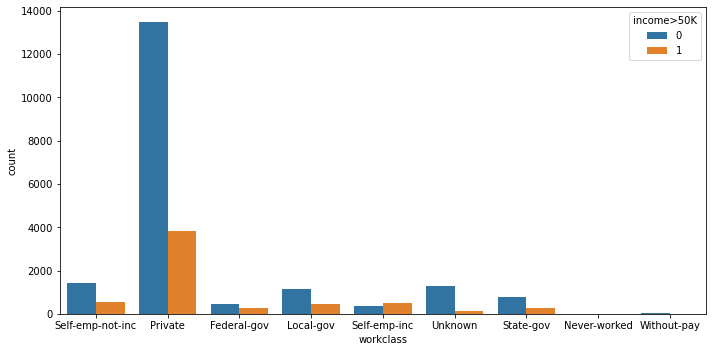

In [13]:
# Feature exploration
# workclass
fig = plt.figure(figsize=(10,5))
sns.countplot('workclass', hue='income>50K', data=train)
plt.tight_layout()
plt.show()

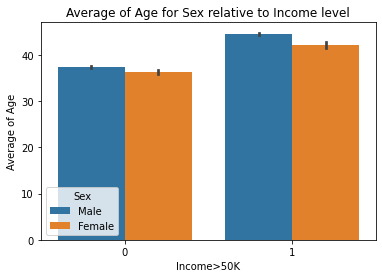

In [14]:
# sex and age 
plt.figure()
ax = sns.barplot(data = train, x = 'income>50K', y = 'age', hue = 'sex')
ax.legend(title = 'Sex')
plt.title('Average of Age for Sex relative to Income level')
plt.xlabel('Income>50K')
plt.ylabel('Average of Age');

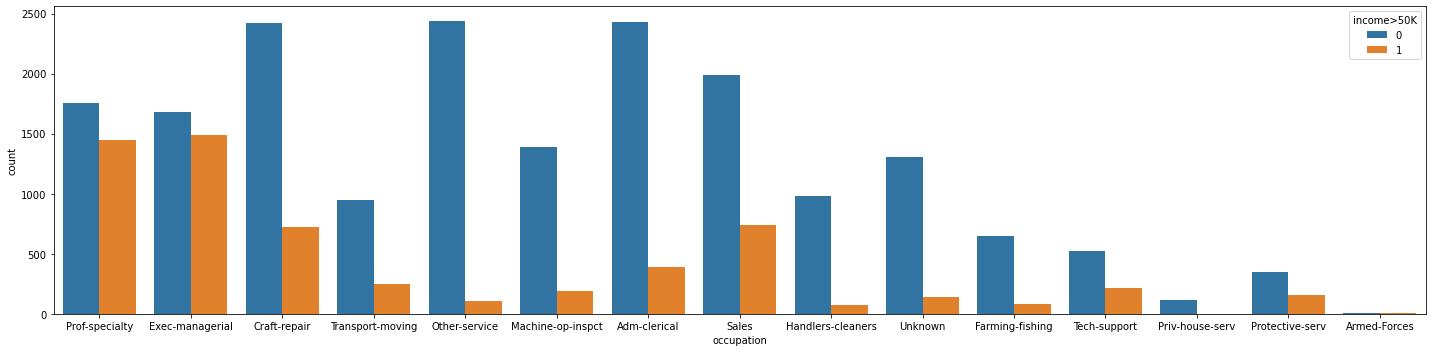

In [15]:
# workclass
fig = plt.figure(figsize=(20,5))
sns.countplot('occupation', hue='income>50K', data=train)
plt.tight_layout()
plt.show()

In [16]:
# data prepration 
# make a copy of train and test data 
train_prep = train.copy()
test_prep = test.copy()

ID = test_prep['ID']
test_prep = test_prep.drop('ID', axis=1)

In [17]:
# encoding
train_prep['sex'].replace(to_replace = ['Female', 'Male'], value =[0,1], inplace=True)
test_prep['sex'].replace(to_replace = ['Female', 'Male'], value =[0,1], inplace=True)



In [18]:
# get cat_columns
cat_columns = ["workclass", "marital.status","occupation","relationship","race","native.country"]

In [19]:
train_prep = pd.get_dummies(train_prep, prefix_sep="__",
                              columns=cat_columns)

In [20]:
cat_dummies = [col for col in train_prep
               if "__" in col 
               and col.split("__")[0] in cat_columns]
processed_columns = list(train_prep.columns[:])

In [21]:
test_prep = pd.get_dummies(test_prep, prefix_sep="__", 
                                   columns=cat_columns)

In [22]:
# remove additional columns
for col in test_prep:
    if ("__" in col) and (col.split("__")[0] in cat_columns) and col not in cat_dummies:
        print("Removing additional feature {}".format(col))
        test_prep.drop(col, axis=1, inplace=True)

Removing additional feature native.country__Holand-Netherlands


In [23]:
# Add missing columns
for col in cat_dummies:
    if col not in test_prep:
        print("Adding missing feature {}".format(col))
        test_prep[col] = 0

In [26]:
# scale numeric columns
numerical = ['age', 'capital.gain', 'hours.per.week', 'fnlwgt']
scaler = MinMaxScaler()
train_prep[numerical] = scaler.fit_transform(train_prep[numerical])
test_prep[numerical] = scaler.fit_transform(test_prep[numerical])

In [28]:
x_train = train_prep.drop('income>50K', axis=1)
y_train = train_prep['income>50K']

In [29]:
x_train

,age,fnlwgt,education.num,sex,capital.gain,capital.loss,hours.per.week,workclass__Federal-gov,workclass__Local-gov,workclass__Never-worked,...,native.country__Puerto-Rico,native.country__Scotland,native.country__South,native.country__Taiwan,native.country__Thailand,native.country__Trinadad&Tobago,native.country__United-States,native.country__Unknown,native.country__Vietnam,native.country__Yugoslavia
0,0.493151,0.054910,15,1,0.00000,0,0.397959,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.219178,0.075190,13,1,0.00000,0,0.397959,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0.410959,0.089681,9,1,0.00000,0,0.397959,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.315068,0.069206,9,0,0.00000,0,0.397959,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0.301370,0.069909,9,1,0.00000,0,0.500000,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0.013699,0.048146,9,0,0.00000,0,0.244898,0,0,0,...,0,0,0,0,0,0,1,0,0,0
24996,0.643836,0.128849,9,0,0.00000,0,0.346939,0,1,0,...,0,0,0,0,0,0,1,0,0,0
24997,0.301370,0.144278,14,1,0.00000,0,0.397959,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24998,0.493151,0.226360,9,1,0.04787,0,0.459184,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [30]:
test_prep

,age,fnlwgt,education.num,sex,capital.gain,capital.loss,hours.per.week,workclass__Federal-gov,workclass__Local-gov,workclass__Never-worked,...,native.country__Puerto-Rico,native.country__Scotland,native.country__South,native.country__Taiwan,native.country__Thailand,native.country__Trinadad&Tobago,native.country__United-States,native.country__Unknown,native.country__Vietnam,native.country__Yugoslavia
0,0.219178,0.144714,9,1,0.000000,0,0.397959,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0.698630,0.010921,9,0,0.000000,0,0.112245,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0.232877,0.062488,9,1,0.000000,0,0.397959,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.547945,0.062354,3,1,0.000000,0,0.397959,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0.424658,0.096691,10,0,0.000000,0,0.397959,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23837,0.123288,0.020747,13,1,0.000000,0,0.397959,0,0,0,...,0,0,0,0,0,0,1,0,0,0
23838,0.136986,0.071348,13,0,0.000000,0,0.397959,0,0,0,...,0,0,0,0,0,0,1,0,0,0
23839,0.684932,0.117265,10,1,0.200512,0,0.193878,0,0,0,...,0,0,0,0,0,0,1,0,0,0
23840,0.397260,0.181142,12,1,0.000000,0,0.397959,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [43]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(0.005)
X = selector.fit_transform(x_train)
X_test = selector.fit_transform(test_prep)

In [44]:
x_Std=StandardScaler().fit_transform(X)
x_Std_test=StandardScaler().fit_transform(X_test)

In [35]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)

In [45]:
principalComponents = pca.fit_transform(x_Std)
principalComponents_test = pca.fit_transform(x_Std_test)

In [46]:
principalDf = pd.DataFrame(data = principalComponents)
principalDf_test = pd.DataFrame(data = principalComponents_test)

In [47]:
model_logi=LogisticRegression()
model_logi.fit(principalDf,y_train)

LogisticRegression()

In [48]:
prediction_logi = model_logi.predict(principalDf_test)

In [49]:
prediction_logi = pd.Series(prediction_logi, name="prediction")

In [50]:
res = pd.concat([ID, prediction_logi], axis=1)


In [51]:
res.to_csv('pred_logi.csv', encoding='utf-8', index=False)

In [216]:
# random forest 
# feature importance 

DecisionTreeClassifier()

In [54]:
from sklearn.preprocessing import LabelEncoder
cens_conc = train.copy()

for col in cens_conc.columns:
    if cens_conc[col].dtypes == 'object':
        encoder = LabelEncoder()
        cens_conc[col] = encoder.fit_transform(cens_conc[col])

In [56]:
# Partioning the data
Xc = cens_conc.drop('income>50K', axis=1)
yc = cens_conc['income>50K']

clf = RandomForestClassifier()
clf.fit(Xc, yc)


# View a list of the features and their importance scores
print('\nFeatures Importance:')
feat_imp = pd.DataFrame(zip(Xc.columns.tolist(), clf.feature_importances_ * 100), columns=['feature', 'importance'])
feat_imp



Features Importance:


,feature,importance
0,age,14.774270
1,workclass,3.854700
2,fnlwgt,16.923166
3,education.num,12.451459
4,marital.status,7.125969
5,occupation,6.338449
6,relationship,9.767824
7,race,1.365997
8,sex,1.035031
9,capital.gain,12.485760


In [76]:
# final data
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import cross_validate

cens_final = train.copy()
cens_final.drop(['race', 'sex', 'capital.loss', 'native.country'], axis=1, inplace=True)
test_final = test.copy()
test_final.drop(['race', 'sex', 'capital.loss', 'native.country'], axis=1, inplace=True)


# Scalling
numerical = ['age', 'capital.gain', 'hours.per.week', 'fnlwgt']
scaler = MinMaxScaler()
cens_final[numerical] = scaler.fit_transform(cens_final[numerical])
test_final[numerical] = scaler.fit_transform(test_final[numerical])
# Create dummy variables
cens_final = pd.get_dummies(cens_final)
test_final = pd.get_dummies(test_final)

ID = test_final['ID']
test_final = test_final.drop('ID', axis=1)


# Partioning
Xf = cens_final.drop('income>50K', axis=1)
yf = cens_final['income>50K']

# Oversampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(Xf, yf)

In [77]:
clf = RandomForestClassifier()

results = cross_validate(clf, X_resampled, y_resampled, cv=5, scoring=['accuracy', 'f1'], return_train_score=True)
print("Accuracy:" , 'train: ', results['train_accuracy'].mean(), '| test: ', results['test_accuracy'].mean())
print("F1-score:" , 'train: ', results['train_f1'].mean(), '| test: ', results['test_f1'].mean())

Accuracy: train:  0.9999472962567857 | test:  0.9321706943219775
F1-score: train:  0.9999472995116291 | test:  0.9354992492386567


In [80]:
# predict 
clf.fit(X_resampled,y_resampled)
prediction_rf = clf.predict(test_final)

In [81]:
prediction_rf = pd.Series(prediction_rf, name="prediction")
res = pd.concat([ID, prediction_rf], axis=1)
res.to_csv('pred_rf.csv', encoding='utf-8', index=False)

In [87]:
# gradiant boostingg
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(random_state=42)

parameters = [{'learning_rate': [0.05, 0.1, 0.15]},
              {'n_estimators' : [250, 500, 750]}
              ]

scorer = make_scorer(fbeta_score, beta=0.5)
grid_obj = GridSearchCV(clf, parameters, scoring=scorer , n_jobs=1)
# grid_fit = grid_obj.fit(Xf, yf)
# best_clf = grid_fit.best_estimator_

# best_predictions = best_clf.predict(test_final)

In [88]:
grid_fit = grid_obj.fit(Xf, yf)

In [89]:
best_clf = grid_fit.best_estimator_

In [90]:
best_predictions = best_clf.predict(test_final)

In [93]:
prediction_gb = pd.Series(best_predictions, name="prediction")
res = pd.concat([ID, prediction_gb], axis=1)
res.to_csv('pred_gb.csv', encoding='utf-8', index=False)

In [94]:
# SVM
from sklearn.svm import SVC
model_svc=SVC()
model_svc.fit(Xf,yf)

SVC()

In [97]:
predictions_svm = model_svc.predict(test_final)

In [98]:
predictions_svm = pd.Series(predictions_svm, name="prediction")
res = pd.concat([ID, predictions_svm], axis=1)
res.to_csv('pred_svm.csv', encoding='utf-8', index=False)